<a href="https://colab.research.google.com/github/paul-reiners/tutorials/blob/main/nbs/10b_tutorial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression
> We will use the same data used in the classification tutorial for this task (the IXI Dataset). The approach for regression tasks is nearly identical. Therefore, take a look at the classification tutorial for explanations of the various cells.

[![Google Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MMIV-ML/fastMONAI/blob/master/nbs/10b_tutorial_regression.ipynb)

In [1]:
#| hide
#Install `fastMONAI` if notebook is running on Google Colab
try:
    import google.colab
    %pip install fastMONAI
    from fastMONAI.utils import print_colab_gpu_info
    print_colab_gpu_info()
except:
    print('Running locally')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.1/233.1 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.8/172.8 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.6/146.6 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 60.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 48.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 67.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from fastMONAI.vision_all import *

In [3]:
path = Path('../data')
path.mkdir(exist_ok=True)

In [4]:
STUDY_DIR = download_ixi_data(path=path)

IXI-T1.tar: 100%|██████████| 4.51G/4.51G [06:33<00:00, 12.3MB/s]

2024-06-23 17:10:33,466 - INFO - Downloaded: ../data/IXI/IXI-T1.tar
2024-06-23 17:10:33,468 - INFO - Expected md5 is None, skip md5 check for file ../data/IXI/IXI-T1.tar.
2024-06-23 17:10:33,469 - INFO - Writing into directory: ../data/IXI/T1_images.



IXI.xls: 208kB [00:03, 61.0kB/s]                          

2024-06-23 17:11:14,595 - INFO - Downloaded: ../data/IXI/IXI.xls
2024-06-23 17:11:14,596 - INFO - Expected md5 is None, skip md5 check for file ../data/IXI/IXI.xls.


Preprocessing ../data/IXI/IXI.xls


### Looking at the data

In [5]:
df = pd.read_csv(STUDY_DIR/'dataset.csv')
df['age'] = np.around(df.age_at_scan.tolist(), decimals=0)

In [6]:
df.head()

,t1_path,subject_id,gender,age_at_scan,age
0,../data/IXI/T1_images/IXI002-Guys-0828-T1.nii.gz,IXI002,F,35.80,36.0
1,../data/IXI/T1_images/IXI012-HH-1211-T1.nii.gz,IXI012,M,38.78,39.0
2,../data/IXI/T1_images/IXI013-HH-1212-T1.nii.gz,IXI013,M,46.71,47.0
3,../data/IXI/T1_images/IXI014-HH-1236-T1.nii.gz,IXI014,F,34.24,34.0
4,../data/IXI/T1_images/IXI015-HH-1258-T1.nii.gz,IXI015,M,24.28,24.0


In [7]:
df.age.min(), df.age.max()

(20.0, 86.0)

In [8]:
med_dataset = MedDataset(path=STUDY_DIR/'T1_images', max_workers=12)

In [9]:
data_info_df = med_dataset.summary()

In [10]:
data_info_df.head()

,dim_0,dim_1,dim_2,voxel_0,voxel_1,voxel_2,orientation,example_path,total
3,256,256,150,0.9375,0.9375,1.2,PSR+,../data/IXI/T1_images/IXI002-Guys-0828-T1.nii.gz,498
2,256,256,146,0.9375,0.9375,1.2,PSR+,../data/IXI/T1_images/IXI035-IOP-0873-T1.nii.gz,74
4,256,256,150,0.9766,0.9766,1.2,PSR+,../data/IXI/T1_images/IXI297-Guys-0886-T1.nii.gz,5
0,256,256,130,0.9375,0.9375,1.2,PSR+,../data/IXI/T1_images/IXI023-Guys-0699-T1.nii.gz,2
1,256,256,140,0.9375,0.9375,1.2,PSR+,../data/IXI/T1_images/IXI020-Guys-0700-T1.nii.gz,2


In [11]:
resample, reorder = med_dataset.suggestion()

In [12]:
bs=4
in_shape = [1, 256, 256, 160]

In [13]:
item_tfms = [ZNormalization(), PadOrCrop(in_shape[1:]), RandomAffine(scales=0, degrees=5, isotropic=False)]

In [14]:
dblock = MedDataBlock(blocks=(ImageBlock(cls=MedImage), RegressionBlock),
                      splitter=RandomSplitter(seed=32),
                      get_x=ColReader('t1_path'),
                      get_y=ColReader('age'),
                      item_tfms=item_tfms,
                      reorder=reorder,
                      resample=resample)

In [15]:
dls = dblock.dataloaders(df, bs=bs)

In [16]:
len(dls.train_ds.items), len(dls.valid_ds.items)

(449, 112)

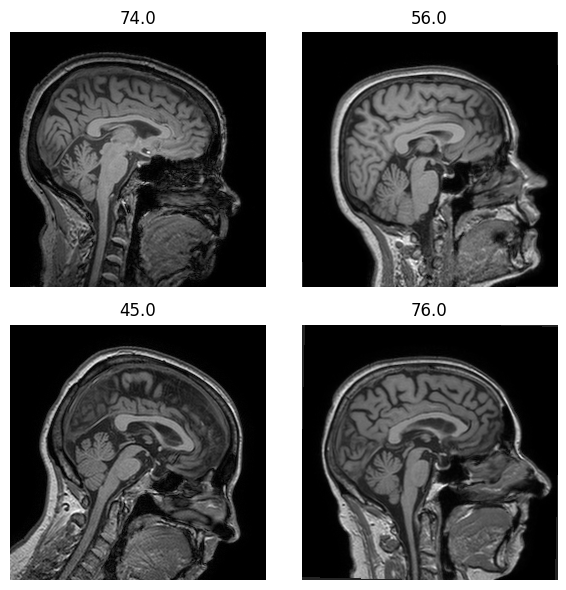

In [17]:
dls.show_batch(anatomical_plane=2)

### Create and train a 3D model

Import a network from MONAI that can be used for regression tasks, and define the input image size, the output size, channels, etc.  

In [18]:
from monai.networks.nets import Regressor
model = Regressor(in_shape=[1, 256, 256, 160], out_shape=1, channels=(16, 32, 64, 128, 256),strides=(2, 2, 2, 2), kernel_size=3, num_res_units=2)

In [19]:
loss_func = L1LossFlat()

In [20]:
learn = Learner(dls, model, loss_func=loss_func, metrics=[mae])

In [ ]:
learn.summary()

In [ ]:
learn.lr_find()

In [ ]:
lr = 1e-4

In [ ]:
learn.fit_one_cycle(4)

In [ ]:
learn.save('model-brainage');

### Inference

In [ ]:
learn.load('model-brainage');

In [ ]:
interp = Interpretation.from_learner(learn)

In [ ]:
interp.plot_top_losses(k=9, anatomical_plane=2)